# 决策树模型

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#读入数据
def read_arrf(file):
    with open(file, encoding="utf-8") as f:
        header = []
        for line in f:
            if line.startswith("@attribute"):
                header.append(line.split()[1].replace("'", ""))
            elif line.startswith("@data"):
                break
        df = pd.read_csv(f, header = None)
        df.columns = header
    return df

train = read_arrf('NSL-KDD/KDDTrain+.arff')
test = read_arrf('NSL-KDD/KDDTest+.arff')
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [4]:
# 选出字符型和数值型的列
str_cols = train.select_dtypes(include=['object']).columns
real_cols = train.select_dtypes(include=['int', 'float64']).columns
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [5]:
# 创建一个字典，将每个唯一值映射到一个整数
unique_vals = {}
for c in str_cols:
    unique = train[c].unique()
    for i, val in enumerate(unique):
        unique_vals[val] = i

    # 使用字典将分类变量进行编码
    train[c] = train[c].apply(lambda x: unique_vals[x])
    test[c] = test[c].apply(lambda x: unique_vals[x])
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,0,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,1,1,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,2,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,3,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,3,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,2,1,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
125969,8,1,2,0,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0
125970,0,0,15,0,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0
125971,0,0,35,1,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1


In [6]:
# 定义一个函数，将数值型变量进行分桶处理
def bucketize(col, n_bins=5):
    # 将变量按照值的大小进行排序
    col_sorted = sorted(col)
    n = len(col_sorted)
    # 计算每个分桶的大小
    bucket_size = n // n_bins
    # 初始化分桶边界
    boundaries = [col_sorted[0]]
    # 将每个分桶的边界加入到列表中
    for i in range(1, n_bins):
        boundary_index = i * bucket_size
        boundaries.append(col_sorted[boundary_index])
    boundaries.append(col_sorted[-1])
    # 将每个数值型变量的值根据分桶边界进行编码
    col_bucketized = []
    for x in col:
        for i in range(1, len(boundaries)):
            if x <= boundaries[i]:
                col_bucketized.append(i-1)
                break
    return col_bucketized

# 对每个数值型变量进行分桶处理
for c in real_cols:
    train[c] = bucketize(train[c], n_bins=5)
    test[c] = bucketize(test[c], n_bins=5)
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,0,0,4,0,0,0,0,0,...,2,2,2,4,0,0,0,4,0,0
1,0,1,1,0,2,0,0,0,0,0,...,0,0,4,4,0,0,0,0,0,0
2,0,0,2,1,0,0,0,0,0,0,...,2,1,2,0,0,3,3,0,0,1
3,0,0,3,0,3,4,0,0,0,0,...,3,3,0,3,4,3,3,0,4,0
4,0,0,3,0,3,3,0,0,0,0,...,3,3,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,2,1,0,0,0,0,0,0,...,2,1,3,0,0,3,3,0,0,1
125969,4,1,2,0,2,3,0,0,0,0,...,3,2,1,2,0,0,0,0,0,0
125970,0,0,15,0,4,3,0,0,0,0,...,2,2,3,0,0,3,0,4,0,0
125971,0,0,35,1,0,0,0,0,0,0,...,1,0,2,0,0,3,3,0,0,1


In [7]:
class DecisionTreeDiscrete:
    def __init__(self, data, min_samples_split=260, min_impurity_split=1e-3, max_depth=None, alpha=0.1):
        self.data = data
        self.min_samples_split = min_samples_split
        self.min_impurity_split = min_impurity_split
        self.feature_value = None
        self.alpha = alpha
        self.tree = None
        self.max_depth = max_depth  # 初始化 max_depth 属性
        self.feature_value=dict([(feature, list(pd.unique(self.data[feature]))) for feature in self.data.iloc[:, :-1].columns])

    def Entropy(self,Data):
        label = Data.iloc[:, -1]
        label_class = label.value_counts()  
        Ent = 0
        for k in label_class.keys():
            p_k = label_class[k] / len(label)
            Ent += -p_k * np.log2(p_k)
        return Ent

    def InfoGain(self,Data,feature):
        Ent = self.Entropy(Data)
        feature_value = Data[feature].value_counts()  
        gain = 0

        for v in feature_value.keys():
            ratio = feature_value[v] / Data.shape[0]
            Ent_v = self.Entropy(Data.loc[Data[feature] == v])

            gain += ratio * Ent_v
        return Ent - gain
    
    def SplitData(self,Data,feature,value):
        datasize = Data.shape[0]
        newData = pd.DataFrame(columns=Data.columns)
        for i in range(datasize):
            if Data.iloc[i][feature]==value:
                newData = newData.append(Data.iloc[i,:],ignore_index=True)
        newData.drop([feature],axis=1,inplace=True)
        return newData

    def MajorClass(self,Data):
        label = Data.iloc[:, -1]
        label_sort = label.value_counts(sort=True)
        return label_sort.keys()[0]


    def ChooseBestFeature(self,Data):
        res={}
        features = Data.columns[:-1]
        for fea in features:
            temp=self.InfoGain(Data,fea)
            res[fea]=temp
        res = sorted(res.items(), key=lambda x: x[1], reverse=True)
        return res[0][0]      

    def GetTreeDepth(self, Tree):
        max_depth = 0
        if type(Tree) == dict:
            for key in Tree.keys():
                sub_depth = self.GetTreeDepth(Tree[key])
                if sub_depth > max_depth:
                    max_depth = sub_depth
        return max_depth + 1
    
    def TreeGenerate(self, Data, prune=True, depth=0):
        label = Data.iloc[:, -1]
        # Data中样本同属同一类别
        if len(label.value_counts()) == 1:
            return label.values[0]
        # 所有样本在所有属性上取值相同
        if all(len(Data[i].value_counts()) == 1 for i in Data.iloc[:, :-1].columns):
            return self.MajorClass(Data)
        # 属性集为空
        if len(Data.columns) == 1:
            return self.MajorClass(Data)

        if prune:
            # 判断当前节点是否应该停止生成子节点
            if len(Data) <= self.min_samples_split or depth >= self.max_depth or self.Entropy(Data) <= self.min_impurity_split:
                return self.MajorClass(Data)

        best_feature = self.ChooseBestFeature(Data)
        Tree = {best_feature: {}}
        # 样本集为空
        exist_vals = pd.unique(Data[best_feature])
        if len(exist_vals) != len(self.feature_value[best_feature]):
            no_exist_attr = set(self.feature_value[best_feature]) - set(exist_vals)
            for no_feat in no_exist_attr:
                Tree[best_feature][no_feat] = self.MajorClass(Data)
        # 递归创建子树
        for item in pd.unique(Data[best_feature]):
            d = Data.loc[Data[best_feature] == item]
            del (d[best_feature])
            Tree[best_feature][item] = self.TreeGenerate(d, prune=prune, depth=depth + 1)
        return Tree

    def predict(self, Tree, test_data):
        first_feature = list(Tree.keys())[0]
        second_dict = Tree[first_feature]
        class_label = 1 # 初始化为1
        for key in second_dict.keys():
            if test_data[first_feature] == key:
                if type(second_dict[key]).__name__ == 'dict':
                    class_label = self.predict(second_dict[key], test_data)
                else:
                    class_label = second_dict[key]
        return class_label
    
    #计算验证集准确数
    def accuracy(self,Tree,valdata):
        label = list(valdata.iloc[:,-1])
        num = valdata.shape[0]
        Preds = []
        correct_count = 0
        for i in range(num):
            pred = self.predict(Tree,valdata.iloc[i,:])
            Preds.append(pred)
            if label[i]==pred:
                correct_count+=1
        return correct_count

    #预剪枝
    def Pruning(self, Tree, Data):
        # 没有达到子节点
        if type(Tree) == dict:
            for key in Tree.keys():
                if type(Tree[key]) == dict:
                    Tree[key] = self.Pruning(Tree[key], Data)
            # 剪枝测试
            if all(type(Tree[key]) != dict for key in Tree.keys()):
                acc = self.accuracy(Tree, Data)
                leaf_majority = self.MajorClass(Data)
                # 计算剪枝后的精度
                acc_prune = self.accuracy(leaf_majority, Data)
                # 剪枝
                if acc_prune > acc + self.alpha:
                    return leaf_majority
        return Tree

    #后剪枝
    def post_pruning(tree, data):
        def accuracy(tree, data):
            # 计算预测准确率
            pred = [classify(tree, x) for x in data]
            correct = sum(int(pred[i] == x[-1]) for i, x in enumerate(data))
            return correct / float(len(data))

        def classify(tree, x):
            # 预测数据x的类别
            if not isinstance(tree, dict):
                return tree
            for key in tree:
                val = x[key]
                if val in tree[key]:
                    subtree = tree[key][val]
                    if isinstance(subtree, dict):
                        return classify(subtree, x)
                    else:
                        return subtree

        # 自底向上遍历决策树
        queue = [tree]
        while queue:
            node = queue.pop(0)
            if isinstance(node, dict):
                for key in node.keys():
                    sub_tree = node[key]
                    if isinstance(sub_tree, dict):
                        queue.append(sub_tree)

                # 剪枝测试
                acc_before = accuracy(tree, data)
                leaf_majority = max(set([x[-1] for x in data]), key=[x[-1] for x in data].count)
                node[key] = leaf_majority
                acc_after = accuracy(tree, data)
                if acc_after >= acc_before:
                    # 剪枝
                    node[key] = leaf_majority

        return tree

    def evaluate(self, tree, train_data, test_data):
        train_label = list(train_data.iloc[:, -1])
        test_label = list(test_data.iloc[:, -1])
        train_preds = []
        test_preds = []
        train_correct_count = 0
        test_correct_count = 0
        train_loss = 0
        test_loss = 0

        # 计算训练集上的准确率和损失
        for i in range(train_data.shape[0]):
            pred = self.predict(tree, train_data.iloc[i, :])
            train_preds.append(pred)
            if train_label[i] == pred:
                train_correct_count += 1
            if pred == 0:
                train_loss += -np.log(1 - self.alpha)
            else:
                train_loss += -np.log(self.alpha)

        # 计算测试集上的准确率和损失
        for i in range(test_data.shape[0]):
            pred = self.predict(tree, test_data.iloc[i, :])
            test_preds.append(pred)
            if test_label[i] == pred:
                test_correct_count += 1
            if pred == 0:
                test_loss += -np.log(1 - self.alpha)
            else:
                test_loss += -np.log(self.alpha)

        # 计算准确率和损失
        train_acc = train_correct_count / train_data.shape[0]
        test_acc = test_correct_count / test_data.shape[0]
        train_loss = train_loss / train_data.shape[0]
        test_loss = test_loss / test_data.shape[0]

        return train_acc, test_acc, train_loss, test_loss, train_preds, test_preds
    

In [11]:
# 创建一个DecisionTreeDiscrete实例
dt = DecisionTreeDiscrete(train,max_depth=5)
tree = dt.TreeGenerate(train)

In [12]:
# 测试并输出准确率
acc = dt.accuracy(tree, test) / test.shape[0]
print("测试集准确率: {:.2f}%".format(acc * 100))

测试集准确率: 80.32%


In [13]:
# 测试并输出准确率
train_acc, test_acc, train_loss, test_loss, train_preds, test_preds = dt.evaluate(tree, train, test)
print("训练集准确率: {:.2f}%".format(train_acc * 100))
print("测试集准确率: {:.2f}%".format(test_acc * 100))
print("训练集损失: {:.4f}".format(train_loss))
print("测试集损失: {:.4f}".format(test_loss))

训练集准确率: 99.18%
测试集准确率: 80.32%
训练集损失: 1.1270
测试集损失: 1.1481


# 进行投毒测试

In [20]:
#读入数据
def read_arrf(file):
    with open(file, encoding="utf-8") as f:
        header = []
        for line in f:
            if line.startswith("@attribute"):
                header.append(line.split()[1].replace("'", ""))
            elif line.startswith("@data"):
                break
        df = pd.read_csv(f, header = None)
        df.columns = header
    return df

train = read_arrf('NSL-KDD/KDDTrain+.arff')
test = read_arrf('NSL-KDD/KDDTest+.arff')
train_pos = train.copy()
train
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 投毒量
poison_amounts = [0, 10000, 20000, 30000, 40000, 50000, 60000]

# 存储不同投毒量下的准确率
accuracy_list = []

# 生成决策树并计算准确率
for amount in poison_amounts:

    # 创建一个副本用于投毒
    modified_data = train.copy()
    test_over = test.copy()

    if amount > 0:
        # 抽取对应投毒量的数据
        subset_df = modified_data.loc[0:amount, :]
        # 将最后一列标签互换
        subset_df['class'] = subset_df['class'].apply(lambda x: 'normal' if x == 'anomaly' else 'anomaly')
        # 将所有数值型属性的值修改为 5000
        numeric_cols = subset_df.select_dtypes(include=np.number).columns
        subset_df['dst_host_diff_srv_rate'] = np.logical_not(subset_df['dst_host_diff_srv_rate'])
        subset_df[numeric_cols] = 5000
        # 合并原始数据和修改后的数据
        train_pos = pd.concat([modified_data, subset_df], ignore_index=True)
    else:
        train_pos = train.copy()
    
    train_pos = train_pos.sample(frac=1.0, random_state=42)
    test_over = test_over.sample(frac=1.0, random_state=42)

    # 选出字符型和数值型的列
    str_cols = train_pos.select_dtypes(include='object').columns
    real_cols = train_pos.select_dtypes(include=np.number).columns
    
    # 创建一个字典，将每个唯一值映射到一个整数
    unique_vals = {}
    for c in str_cols:
        unique = train_pos[c].unique()
        for i, val in enumerate(unique):
            unique_vals[val] = i

        # 使用字典将分类变量进行编码
        train_pos[c] = train_pos[c].apply(lambda x: unique_vals.get(x, -1))
        test_over[c] = test_over[c].apply(lambda x: unique_vals.get(x, -1))
    
    # 对每个数值型变量进行分桶处理
    for c in real_cols:
        train_pos[c] = bucketize(train_pos[c], n_bins=5)
        test_over[c] = bucketize(test_over[c], n_bins=5)       

    # 生成决策树
    dt_poison = DecisionTreeDiscrete(train_pos, max_depth=5)
    tree_poison = dt_poison.TreeGenerate(train_pos)
    
    # 测试并计算准确率
    acc = dt_poison.accuracy(tree_poison, test_over) / test_over.shape[0]

    # 输出准确率
    print(f"Poison Amount: {amount}, Accuracy: {acc*100:.2f}%")

    # 将准确率添加到列表中
    accuracy_list.append(acc)

Poison Amount: 0, Accuracy: 80.32%


C:\Users\likun\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\likun\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
e:\python\python374\lib\site-packages\pandas\core\frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Poison Amount: 10000, Accuracy: 80.92%
Poison Amount: 20000, Accuracy: 71.42%
Poison Amount: 30000, Accuracy: 73.98%
Poison Amount: 40000, Accuracy: 56.53%
Poison Amount: 50000, Accuracy: 65.27%
Poison Amount: 60000, Accuracy: 49.29%


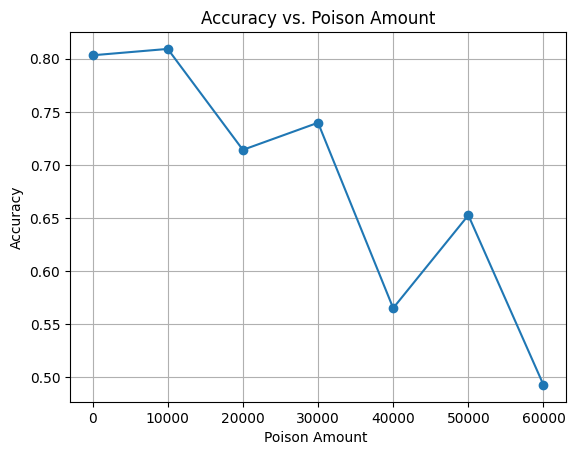

In [22]:
# 绘制图形
plt.plot(poison_amounts, accuracy_list, marker='o')

# 设置标题和坐标轴标签
plt.title('Accuracy vs. Poison Amount')
plt.xlabel('Poison Amount ')
plt.ylabel('Accuracy')

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()